# WORD2VEC

## Working with Word2Vec with Gensim


### Objectives
- Visualize word vectorization
- Prepare gensim environment
- Fit word2vec models
- Interpret latent variables/vectors
- Find similar words and word pairs
- Use externally-trained matrices of latent features

We have been working with a number of techniques and tools that help us navigate the world of NLP. For example, we have CountVectorizer:

In [1]:
%matplotlib inline
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns  
import numpy as np
import matplotlib.pyplot as plt

text = ['That is should come to this!', 'This above all: to thine own self be true.', 'Something is rotten in the state of Denmark.']
vectorizer = CountVectorizer(ngram_range=(1,2))

vectorizer.fit(text)
x = vectorizer.transform(text)
x_back = x.toarray()

pd.DataFrame(x_back, columns=vectorizer.get_feature_names())

,above,above all,all,all to,be,be true,come,come to,denmark,in,...,the,the state,thine,thine own,this,this above,to,to thine,to this,true
0,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,1,0,1,0,1,0
1,1,1,1,1,1,1,0,0,0,0,...,0,0,1,1,1,1,1,1,0,1
2,0,0,0,0,0,0,0,0,1,1,...,1,1,0,0,0,0,0,0,0,0


>An adverse trait about the Bag of Words model: Word context and semantic meaning does not play a role.

>But then came Word2Vec!

>We will see that with Word2Vec, context does play a role and it can decipher relationships between words.

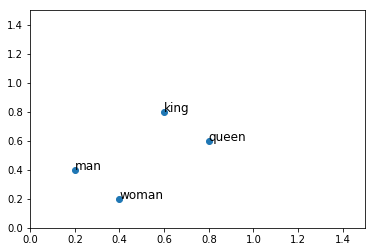

In [2]:
words = ['king','queen', 'man', 'woman']  

vectors = np.array([[0.6,   0.8], 
                    [0.8, 0.6],
                   [.2,.4],[.4,.2]]
                 ) 

plt.plot(vectors[:,0], vectors[:,1], 'o')  
plt.xlim(0, 1.5)  
plt.ylim(0, 1.5)  
for word, x, y in zip(words, vectors[:,0], vectors[:,1]):  
    plt.annotate(word, (x, y), size=12)

More examples:
![](https://www.tensorflow.org/images/linear-relationships.png)

## First things first :

**1) Install Gensim: **

pip install gensim

**  2)  Make sure cython is installed ? **

cython -V

(if no cython):

pip install cython


** 3) test (Run the sample code in following cell) **


In [3]:
import gensim


documents = ["Will this work?  I'm not sure.  If not go to step #4 (above)"]

#turn document into a list of words, remove puncutation
texts = [[word for word in document.lower().split()]
         for document in documents]

print (texts)

#train our own model off our small document corpora :(
model = gensim.models.Word2Vec(texts, size=100, window=5, min_count=1, workers=4,sg=1)

[['will', 'this', 'work?', "i'm", 'not', 'sure.', 'if', 'not', 'go', 'to', 'step', '#4', '(above)']]



**4) If you see the following error : "UserWarning: C extension not loaded for Word2Vec"**


Do the following:

1.  pip uninstall gensim
2.  pip uninstall scipy 

3. pip install --no-cache-dir scipy==0.15.1
4. pip install --no-cache-dir gensim==0.12.1


**Refer to the following:** https://groups.google.com/forum/#!topic/gensim/isBqIhrw9mk

In [4]:
# A 'Gensim' example: 

documents = ["Human machine interface for lab abc computer applications",
             "A survey of user opinion of computer system response time",
             "The EPS user interface management system",
             "System and human system engineering testing of EPS",
              "Relation of user perceived response time to error measurement",
              "The generation of random binary unordered trees",
              "The intersection graph of paths in trees",
              "Graph minors IV Widths of trees and well quasi ordering",
              "Graph minors A survey"]

## Word2Vec Preprocessing

1. Tokenization   
2. Remove stop words    
3. Convert to lowercase     
4. Others: stemming.. 

In [5]:
# The type of input that Word2Vec is looking for.. 
stoplist = set('for a of the and to in'.split())
texts = [[word for word in document.lower().split() if word not in stoplist]
         for document in documents]

print (texts)

[['human', 'machine', 'interface', 'lab', 'abc', 'computer', 'applications'], ['survey', 'user', 'opinion', 'computer', 'system', 'response', 'time'], ['eps', 'user', 'interface', 'management', 'system'], ['system', 'human', 'system', 'engineering', 'testing', 'eps'], ['relation', 'user', 'perceived', 'response', 'time', 'error', 'measurement'], ['generation', 'random', 'binary', 'unordered', 'trees'], ['intersection', 'graph', 'paths', 'trees'], ['graph', 'minors', 'iv', 'widths', 'trees', 'well', 'quasi', 'ordering'], ['graph', 'minors', 'survey']]


###  2: Word Representation

Learn a continuous representation of words.
Each word (w) is associated with it's own word vector

In [6]:
import gensim  # using skip-gram

model = gensim.models.Word2Vec(texts, size=100, window=5, min_count=1, workers=2, sg=1)

[See Wiki on arguments](https://en.wikipedia.org/wiki/Word2vec)

A Word2vec model can be trained with hierarchical softmax and/or negative sampling. To approximate the conditional log-likelihood a model seeks to maximize, the hierarchical softmax method uses a Huffman tree to reduce calculation. The negative sampling method, on the other hand, approaches the maximization problem by minimizing the log-likelihood of sampled negative instances. According to the authors, hierarchical softmax works better for infrequent words while negative sampling works better for frequent words and better with low dimensional vectors. As training epochs increase, hierarchical softmax stops being useful.

The size of the context window determines how many words before and after a given word would be included as context words of the given word. The recommended value is 10 for skip-gram and 5 for CBOW.

In [7]:
# take a look at vocab
list(model.wv.vocab.items())[:7]

[('human', <gensim.models.keyedvectors.Vocab at 0x1a1fa014e0>),
 ('machine', <gensim.models.keyedvectors.Vocab at 0x1a1f323518>),
 ('interface', <gensim.models.keyedvectors.Vocab at 0x1a20850c18>),
 ('lab', <gensim.models.keyedvectors.Vocab at 0x10d09fc88>),
 ('abc', <gensim.models.keyedvectors.Vocab at 0x10d09f8d0>),
 ('computer', <gensim.models.keyedvectors.Vocab at 0x10d0a85f8>),
 ('applications', <gensim.models.keyedvectors.Vocab at 0x10d0a8ac8>)]

In [8]:
#  and voila, we have our word vector 
model['trees']

/Users/timrand/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


array([ 1.9056784e-04,  2.6331816e-03, -4.5844503e-03,  2.3561271e-03,
        4.9920352e-03,  8.6510717e-04, -9.6040225e-04, -1.5680060e-03,
       -3.5313703e-03, -1.3062753e-03,  3.2207731e-03, -3.3274919e-03,
       -2.6567336e-03,  4.6249432e-03, -4.3160920e-03,  4.1824579e-03,
        4.4141030e-03, -1.8255849e-03, -1.7649719e-03, -2.0514419e-03,
       -1.5970413e-03, -2.4080781e-04, -1.2689905e-03, -4.1478057e-03,
       -4.2156456e-03,  4.7142934e-03, -2.4252262e-03,  1.9159009e-03,
        1.5217380e-03, -3.9557791e-03, -3.3369930e-03,  1.9593821e-03,
       -4.2326646e-03,  2.7611412e-03,  3.7088827e-03, -4.0809829e-03,
        3.8485378e-03, -2.1606151e-03, -1.5226426e-03,  1.7767620e-03,
       -3.0476108e-04, -1.2119826e-03, -2.5951511e-03,  2.1766273e-03,
       -4.8982706e-03,  2.5002356e-03, -1.0236120e-03,  3.4836340e-03,
        4.5883209e-03, -1.9338509e-03,  2.2743291e-03,  2.1312912e-03,
        8.1261771e-04, -5.1826652e-04,  4.8021958e-03,  2.5840544e-03,
      

###  What do we have? Word Embeddings 

**A word embedding W : words → ℝn **

The output above is the result of 'word' projections in a latent space
of N dimensions, (N ~ size of NN layer we chose).     
Our float values above represent the coordinates for the word 'computer' in our 100-dimensional space!

Our high dimensional vectors stand in place for words.    
Note, that these dimensions are encoding 'latent' properties for 'computer' (such that 'queen' will be geometrically closer to 'king' than it would to be to (let's say) 'computer'. 

Word Embeddings are useful because:

1.  We can measure the semantic similarity between two words
2.  We can use these word vectors as features for various NLP supervised learning tasks (such as classification, sentiment analysis). 

## Skip-Gram Methods: 

#### Skip-Gram example sentence:

>"We are on the cusp of deep learning for the masses"

For Context Window = 2:

*We could get the following training examples: (Where target word is __bolded__) *


__We__ are on 

We __are__ on the

We are __on__ the cusp


#### What's happening underneath the hood?:
We have input of skip-gram is a single word (Wi) **'learning'**, we will determine the probability of seeing the words (Wo) : 'of','deep', 'for','the'.

1. Transform our vobabulary into a 'bag of indices'

2. One-hot encode (input vectors) 

3. Randomly initialize the Weight Vectors

4. Get dot product: (Input vector.InputWeightMatrix) ~ (this is just the weight vector for 'learning')

5. Get dot product:  ('learning' weight vector).(Output Weight Matrix) 

6. Calculate Softmax probabilities:
    - What is the probability of 'seeing' the word 'deep' given that we've seen the word 'learning'?  -- >  Using SGD together with softmax regression, we will maximize the probability for 'deep' 
    - P(Wo|Wi) = (exp(Wi.Wo)/ sum(exp(Wi.Woj)   (sum~ sum of all Woj for all j in Vocabulary)

7. As always, we update our Weight matrix to reduce our errors:
    - Wi=Wi-a*ej*Wo

8. Repeat...


<img src='img/skip_gram.png'/>


### CBOW: 


CBOW: very similiar model with the inputs & outputs reversed.  The input layer consists of our word window 

<img src='img/CBOW.png'/>



### Let's work with a corpus from NLTK

In [9]:
# WARNING: Use Scroll bar with NLTK download... or else?
import nltk
#nltk.download()

In [10]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [11]:
# Build corpus from 
import os
from nltk.corpus import stopwords
import re

stop = stopwords.words('english')
stop+=['?','!','.',',',':',';']

#[
#"weren't",
# 'won',
# "won't",
# 'wouldn',
# "wouldn't",
# '?',
# '!',
# '.',
# ',',
# ':',
# ';']

#creating our iterator


# An Illustration.. 

import os

class MySentences(object):
    # a memory-friendly way to load a large corpora
     def __init__(self, dirname):
            self.dirname = dirname
 
     def __iter__(self):
        # iterate through all file names in our directory
         for fname in os.listdir(self.dirname):
                for line in open(os.path.join(self.dirname, fname), encoding="ISO-8859-1"):
                    word=line.lower().split()
                    if word not in stop:
                        yield word

sentences = MySentences('/Users/timrand/nltk_data/corpora/gutenberg') 
model = gensim.models.Word2Vec(sentences,size=100,min_count=3,workers=4)

You'll notice the following examples aren't great: the modeling is learning from a small dataset of gutenberg books. We'll use a better model in the next section with superior results.

In [12]:
model.most_similar('door' ,topn=8)

/Users/timrand/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/Users/timrand/anaconda3/lib/python3.7/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('door,', 0.9188751578330994),
 ('gate', 0.8850337862968445),
 ('top', 0.871757984161377),
 ('mount', 0.8664511442184448),
 ('window', 0.8628943562507629),
 ('table,', 0.8590527772903442),
 ('window,', 0.8446979522705078),
 ('cloud', 0.8374819159507751)]

In [14]:
# Similarity

model.most_similar('rock')

/Users/timrand/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/timrand/anaconda3/lib/python3.7/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('plate', 0.9383689761161804),
 ('floor,', 0.937893271446228),
 ('rock,', 0.9336166381835938),
 ('paper', 0.9298900961875916),
 ('crowd', 0.9280639886856079),
 ('temple.', 0.9261654615402222),
 ('carrying', 0.925046443939209),
 ('advancing', 0.9244281649589539),
 ('contents', 0.9243518114089966),
 ('neck', 0.9242267608642578)]

In [13]:
# Compute cosine_similarity

#takes the mean and then the cosine distance
model.n_similarity(['bread', 'dog'], ['cat', 'dog'])

/Users/timrand/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `n_similarity` (Method will be removed in 4.0.0, use self.wv.n_similarity() instead).
  after removing the cwd from sys.path.
/Users/timrand/anaconda3/lib/python3.7/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.87206644

In [16]:
model.doesnt_match("cat pig dog cow explore".split())

/Users/timrand/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `doesnt_match` (Method will be removed in 4.0.0, use self.wv.doesnt_match() instead).
  """Entry point for launching an IPython kernel.
/Users/timrand/anaconda3/lib/python3.7/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


'explore'

## More Data = Better:
#### Let's work with Google's pre-trained [Word2Vect Model](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit)

In [17]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


KeyboardInterrupt: 

In [14]:
!ls /Users/timrand/nltk_data/corpora

3-grams-2013.tsv                 movie_reviews.zip
3-grams-2013.tsv.gz              stopwords
PubMed-w2v.bin                   stopwords.zip
brown                            treebank
brown.zip                        treebank.zip
google_news                      wikipedia-pubmed-and-PMC-w2v.bin
gutenberg                        words
gutenberg.zip                    words.zip
movie_reviews


In [15]:
#import os

# Setup nltk corpora path and Google Word2Vec location
google_vec_file = '/Users/timrand/nltk_data/corpora/PubMed-w2v.bin'

In [16]:
model = gensim.models.KeyedVectors.load_word2vec_format(google_vec_file, binary=True)

In [17]:
model.most_similar('meeting' ,topn=8)

/Users/timrand/anaconda3/lib/python3.7/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('congress', 0.7604073286056519),
 ('189th', 0.7538500428199768),
 ('JSCN', 0.7445378303527832),
 ('conference', 0.74190354347229),
 ('forty-fourth', 0.7396146059036255),
 ('143rd', 0.7380350828170776),
 ('ESPU', 0.7265064120292664),
 ('Aaas', 0.7248284220695496)]

In [169]:
#import Levenshtein
mols = model.most_similar('DGCR8' ,topn=40)
mols

/Users/timrand/anaconda3/lib/python3.7/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('Ago2', 0.7537841796875),
 ('DCL1', 0.7393876314163208),
 ('Dicer', 0.7200010418891907),
 ('AGO2', 0.7185648679733276),
 ('AGO1', 0.7168599963188171),
 ('pri-miRNA', 0.7079482078552246),
 ('DICER', 0.7037908434867859),
 ('CSR-1', 0.697556734085083),
 ('ASH2L', 0.6961140036582947),
 ('Exportin-5', 0.6952595710754395),
 ('Rtf1', 0.6932278871536255),
 ('GLD-1', 0.6905473470687866),
 ('pri-miRNAs', 0.6885998845100403),
 ('Exp5', 0.6876062154769897),
 ('CHD4', 0.6874486804008484),
 ('Exportin', 0.68733811378479),
 ('PAF1', 0.6861715316772461),
 ('Brd2', 0.6846355199813843),
 ('AGO4', 0.6834419965744019),
 ('PHF8', 0.681982696056366),
 ('Nab2', 0.6811540722846985),
 ('HEN1', 0.6794799566268921),
 ('GW182', 0.678023099899292),
 ('Y14', 0.677935004234314),
 ('DDX5', 0.6773633360862732),
 ('MRG15', 0.6767968535423279),
 ('TRRAP', 0.6749491691589355),
 ('PABPC1', 0.6745913028717041),
 ('RITS', 0.6739385724067688),
 ('Argonaute1', 0.6738437414169312),
 ('DHX9', 0.6737354397773743),
 ('bromodoma

In [149]:
def get_uniq(mols):
    collection = []
    for m in mols:
        collection.append(m[0].upper())
    return set(collection)
        

In [179]:
mols = model.most_similar('p53' ,topn=60) 
list(get_uniq(mols))

/Users/timrand/anaconda3/lib/python3.7/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


['WAF1',
 'P21/WAF1/CIP1',
 'P16(INK4)',
 'RB2/P130',
 'MDM-2',
 'P19(ARF)',
 'P16',
 'WAF1/P21',
 'CYCLIND1',
 'P21',
 'P21/WAF-1',
 'P16(INK4A)',
 'P16INK4A',
 'P21/WAF1',
 'BCL2',
 'P14(ARF)',
 'P27',
 'P33(ING1B)',
 'PTEN',
 'P16INK4',
 'P21(WAF1/CIP1)',
 'P14ARF',
 'PRB2/P130',
 'PRB',
 'P21WAF1/CIP1',
 'P33ING1B',
 'P73',
 'P-53',
 'HDM2',
 'P21(WAF1)',
 'SKP2',
 'WAF-1',
 'MDM2',
 'P27(KIP1)',
 'NM23-H1',
 'E2F-1',
 'P21WAF1',
 'SURVIVIN',
 'E2F1',
 'P53',
 'P19ARF',
 '14-3-3SIGMA']

In [171]:


def delete_replicate_molecules(query, hits):
    collection=[]
    for mol in hits:
        #versions differ only by capitalization, hyphen
        if query.replace('-','').upper() == mol[0].replace('-','').upper():
            next
        else:
            collection.append(mol)
    return(collection)
        #versions differ only by hyphen
    

class Print_both():
    def __init__(self,A,B, trunc_limit=20):
        self.A = A
        self.B = B
        self.trunc_limit = trunc_limit
    def side_by_side(self):
        a_len = len(A)
        b_len = len(B)
        if (a_len - b_len) > 0 :
            shortest = b_len
        else:
            shortest = a_len
        for i in range(shortest):
            self.trunc_limit = 10
            print(B)
            #out_string = f'{str(A[i][0:])[1:10]:50} {str(self.B):50}'
            yield out_string
    
#for i in delete_replicate_molecules('Dicer', mols):
#   print(i)

#A = delete_replicate_molecules('monkey', mols)
B = delete_replicate_molecules('p53', mols)
for i in Print_both(A,B).side_by_side():
    print(i)

[('WAF1/CIP1', 0.853065013885498), ('p21(WAF1)', 0.8515006303787231), ('p21(WAF1/CIP1)', 0.8485446572303772), ('p21WAF1/CIP1', 0.8446862101554871), ('p21', 0.8412282466888428), ('p21/WAF1', 0.8362233638763428), ('p21WAF1', 0.8323950171470642), ('p21(Waf1/Cip1)', 0.8149312734603882), ('mdm2', 0.8135080337524414), ('p21Waf1/Cip1', 0.8118418455123901), ('CDKN1A', 0.8110986948013306), ('p21waf1', 0.8036508560180664), ('p21(waf1)', 0.8014034032821655), ('p21(waf1/cip1)', 0.7994927167892456), ('p21(WAF1/Cip1)', 0.799335241317749), ('CIP1/WAF1', 0.7970014214515686), ('GADD45', 0.7946544885635376), ('WAF-1', 0.7945549488067627), ('Waf1', 0.7915790677070618), ('p21Waf1', 0.7897320985794067)]


NameError: name 'out_string' is not defined

In [87]:
model.most_similar('Dicer' ,topn=50)

/Users/timrand/anaconda3/lib/python3.7/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('miRNA-processing', 0.7470805644989014),
 ('Ago2', 0.7365443110466003),
 ('Drosha', 0.7317155599594116),
 ('DGCR8', 0.7200010418891907),
 ('dicer', 0.7081758975982666),
 ('Dicer1', 0.695800244808197),
 ('DICER', 0.6891276836395264),
 ('Argonaute2', 0.6797058582305908),
 ('AGO1', 0.678330659866333),
 ('pre-let-7', 0.6779454946517944),
 ('microRNA-processing', 0.6755117774009705),
 ('AGO2', 0.6681179404258728),
 ('Argonaute', 0.6662837862968445),
 ('pri-miRNA', 0.665878176689148),
 ('DCL1', 0.6606435179710388),
 ('pri-miRNAs', 0.6571208834648132),
 ('let-7', 0.6549752950668335),
 ('Ago1', 0.6528126001358032),
 ('argonaute-2', 0.6494197845458984),
 ('Eri1', 0.6480423808097839),
 ('Dicer-1', 0.6473559141159058),
 ('Ago2-mediated', 0.6458188891410828),
 ('Argonaute-2', 0.6450265645980835),
 ('Dicer-2', 0.6447961330413818),
 ('CSR-1', 0.6437467336654663),
 ('Dicer-independent', 0.6418540477752686),
 ('Dicer-dependent', 0.6350765228271484),
 ('ta-siRNA', 0.633786678314209),
 ('RDE-1', 0.633

In [ ]:
model.n_similarity(['king', 'man'], ['queen', 'woman'])

Other very cool methods!:      


Doc2Vec extends the word2vec algorithm to larger blocks of texts (paragraphs, documents, articles):    
- https://radimrehurek.com/gensim/models/doc2vec.html
- http://learningaboutdata.blogspot.com/2014/06/plotting-word-embedding-using-tsne-with.html
- https://districtdatalabs.silvrback.com/modern-methods-for-sentiment-analysis
- https://radimrehurek.com/gensim/models/word2vec.html
- https://www.tensorflow.org/tutorials/word2vec

### Some things to keep in Mind when using Word2Vec:

>Word2vec requires a lot of data (millions of words +) to train!

>However, you can download pretrained vectors!

### Objectives
- Visualize word vectorization
- Prepare gensim environment
- Fit word2vec models
- Interpret latent variables/vectors (at a theoretical level)
- Find similar words and word pairs
- Use externally-trained matrices of latent features